# Análisis de los diferentes datasets

En este notebook cargaremos y limpiaremos los dataset definitivos, dejándolos listos para su análisis.

# 1 - Limpiar y combinar datasets

In [6]:
# Libraries
import os
import re
import sys
import time

import numpy as np
import pandas as pd
import requests

# Validate if the path exists before adding it
current_directory = os.getcwd()
root_path = os.path.abspath(os.path.join(current_directory, '..')) 
if os.path.exists(root_path) and root_path not in sys.path: 
    sys.path.append(root_path)
                        
from utils import vizdatatools as viz

## 1.1 - Cargar datasets

In [36]:
# Load datasets
df_idema = pd.read_csv('../data/processed/EMA_info.csv')
df_month_year_climate = pd.read_csv('../data/processed/BC_month_year_climate.csv')
df_anual_climate = pd.read_csv('../data/processed/BC_anual_climate.csv')

# display(df_idema.info())
# display(df_month_year_climate.info())
# display(df_anual_climate.info())


## 1.2 Inspección dataset "EMA_info"

In [32]:
df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    object 
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 51.9+ KB


In [33]:
df_idema

,latitud,provincia,altitud,idema,nombre,indsinop,longitud
0,394924N,ILLES BALEARS,490,B013X,"ESCORCA, LLUC",8304.0,025309E
1,394744N,ILLES BALEARS,5,B051A,"SÓLLER, PUERTO",8316.0,024129E
2,394121N,ILLES BALEARS,60,B087X,BANYALBUFAR,NaN,023046E
3,393445N,ILLES BALEARS,52,B103B,ANDRATX - SANT ELM,99103.0,022208E
4,393305N,ILLES BALEARS,50,B158X,"CALVIÀ, ES CAPDELLÀ",NaN,022759E
...,...,...,...,...,...,...,...
942,424131N,LLEIDA,2467,9988B,CAP DE VAQUÈIRA,8936.0,005826E
943,424201N,LLEIDA,1161,9990X,"NAUT ARAN, ARTIES",8107.0,005237E
944,424634N,LLEIDA,722,9994X,BOSSÒST,NaN,004123E
945,430528N,NAVARRA,334,9995Y,VALCARLOS/LUZAIDE,NaN,011803W


Longitud y Latitud son "strings" y quiero convertirlos en números enteros para poder pintarlos en un scatter


In [37]:
df_idema.loc[:, 'latitud'] = df_idema['latitud'].str.replace('N', '')
# df_idema.loc[:, 'latitud'] = df_idema['latitud'].astype(int)

df_idema.loc[:, 'longitud'] = df_idema['longitud'].str.replace('E', '')
# df_idema.loc[:, 'longitud'] = df_idema['longitud'].astype(int)

In [38]:

df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    object 
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 51.9+ KB


c:\Users\Lander\Documents\Bootcamp_DS\ONLINE_DS_THEBRIDGE_2024\04_Project_Break_I\EDA_Project\src\utils\vizdatatools.py:789: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df, x=num_col1, y=num_col2, size=sizes, sizes=(20, 200), palette='viridis', alpha=0.6, legend=show_legend)


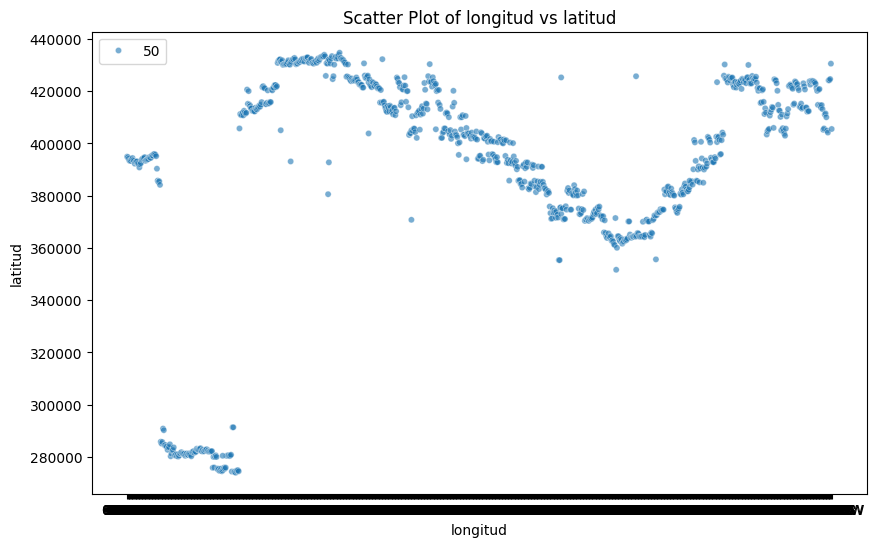

In [39]:
viz.scatterplot(df_idema, 'longitud', 'latitud')